In [41]:
import pandas as pd

raw_dec_benign = pd.read_csv('../data/raw/dec/decimal_benign.csv')
raw_dec_dos = pd.read_csv('../data/raw/dec/decimal_DoS.csv')
raw_dec_gas = pd.read_csv('../data/raw/dec/decimal_spoofing-GAS.csv')
raw_dec_rpm = pd.read_csv('../data/raw/dec/decimal_spoofing-RPM.csv')
raw_dec_speed = pd.read_csv('../data/raw/dec/decimal_spoofing-SPEED.csv')
raw_dec_wheel = pd.read_csv('../data/raw/dec/decimal_spoofing-STEERING_WHEEL.csv')

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

def eda(df, nombre, id='ID'):
    print(f'EDA de {nombre}\n')
    # 1. Display first few rows
    print('Primeras filas:')
    print(df.head(), "\n")
    # 2. General info about dataset
    print(df.info(), "\n")
    # 3. Check duplicates
    num_duplicates = df.duplicated().sum()
    print(f'Filas enteras repetidas: {num_duplicates}\n')
    # 4. Check missing values
    print('Valores ausentes:')
    print(df.isna().sum(), "\n")
    # 5. Check unique CAN IDs
    print(f'Cantidad de CAN IDs únicos: {df[id].nunique()}')
    print('Top 10 CAN IDs más frecuentes:')
    print(df[id].value_counts().head(10), "\n")
    # 6. Descriptive statistics for numeric columns
    print('Estadísticas descriptivas:')
    print(df.describe(), "\n")
    # 7. Check for outliers in the DATA fields
    print('Posibles valores atípicos en los bytes de datos:')
    data_cols = [col for col in df.columns if col.startswith("DATA_")]
    print(df[data_cols].describe(percentiles=[0.01, 0.25, 0.75, 0.99]), "\n")
    # 8. Class distribution
    if 'label' in df.columns:
        print('Distribución de etiquetas:')
        print(df['label'].value_counts(), "\n")
    
    if 'category' in df.columns:
        print('Distribución de categorías:')
        print(df['category'].value_counts(), "\n")
    
    if 'specific_class' in df.columns:
        print('Distribución de clases específicas:')
        print(df['specific_class'].value_counts(), "\n")
    # 9. Byte Correlation Analysis
    if data_cols:
        correlation_matrix = df[data_cols].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlación entre bytes de datos")
        plt.show()
    # 10. Visual Insights
    df[id].value_counts().head(10).plot(kind='bar', title='Top 10 CAN IDs más frecuentes')
    plt.xlabel("CAN ID")
    plt.ylabel("Frecuencia")
    plt.show()

    for col in data_cols:
        plt.figure()
        df[col].hist(bins=50)
        plt.title(f'Distribución de valores en {col}')
        plt.xlabel('Valor del byte')
        plt.ylabel('Frecuencia')
        plt.show()
    # 11. Anomaly Detection
    out_of_range = df[data_cols].apply(lambda x: ((x < 0) | (x > 255)).sum())
    print("Valores fuera de rango (esperado 0-255):")
    print(out_of_range, "\n")

EDA de dec_benign

Primeras filas:
     ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0    65      96       0       0       0       0       0       0       0   
1  1068     132      13     160       0       0       0       0       0   
2   535     127     255     127     255     127     255     127     255   
3   131      15     224       0       0       0       0       0       0   
4   936       1       0      39      16       0       0       0       0   

    label category specific_class  
0  BENIGN   BENIGN         BENIGN  
1  BENIGN   BENIGN         BENIGN  
2  BENIGN   BENIGN         BENIGN  
3  BENIGN   BENIGN         BENIGN  
4  BENIGN   BENIGN         BENIGN   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223737 entries, 0 to 1223736
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1223737 non-null  int64 
 1   DATA_0          1223737 non-null  int64 

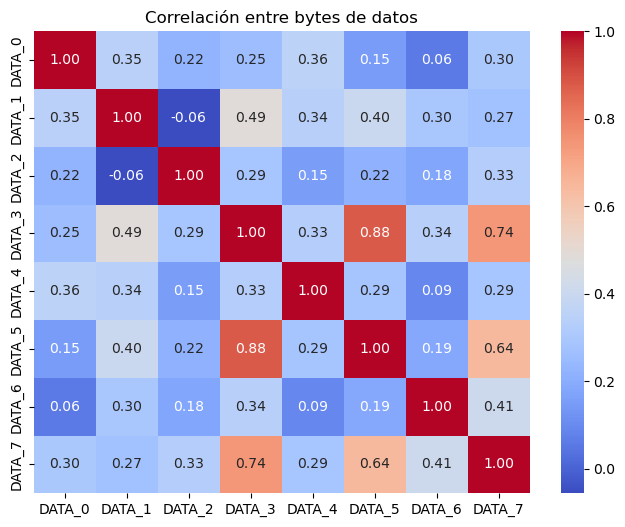

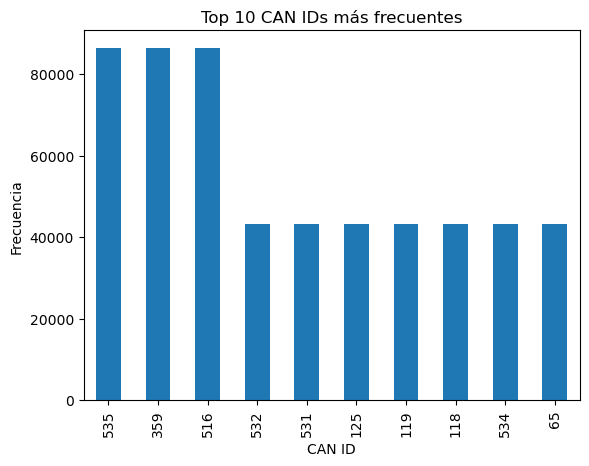

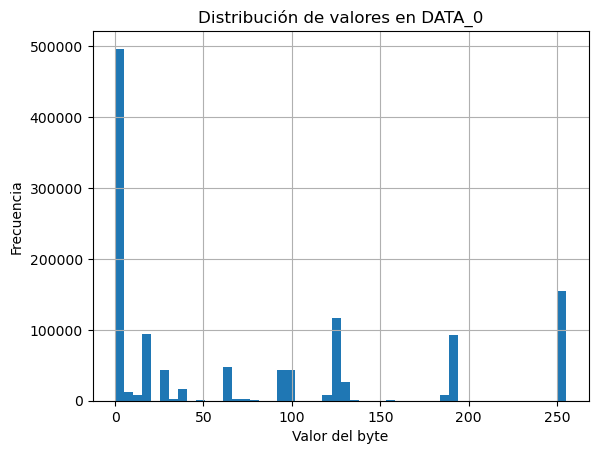

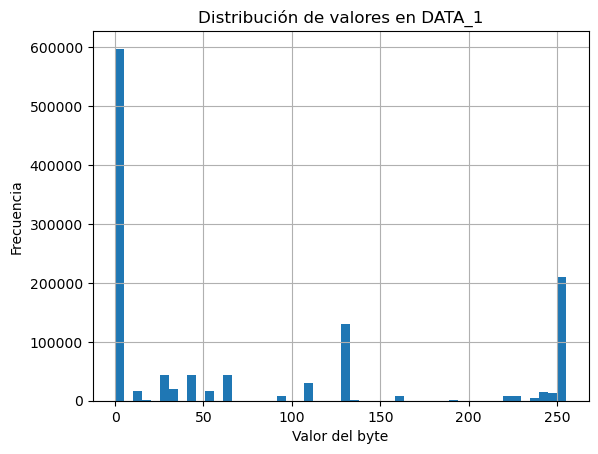

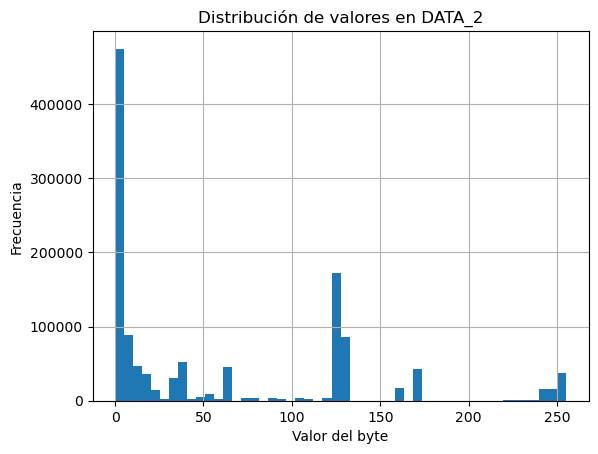

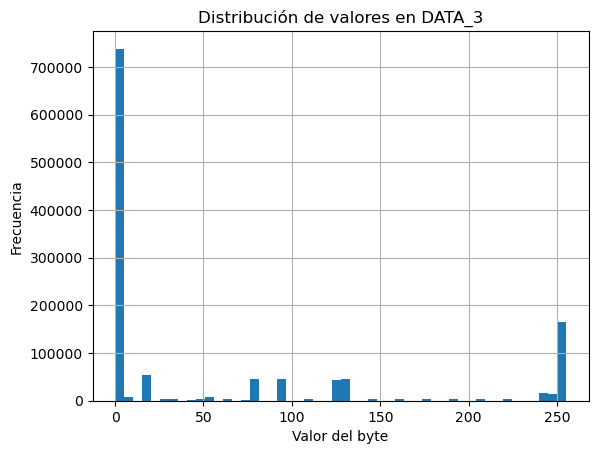

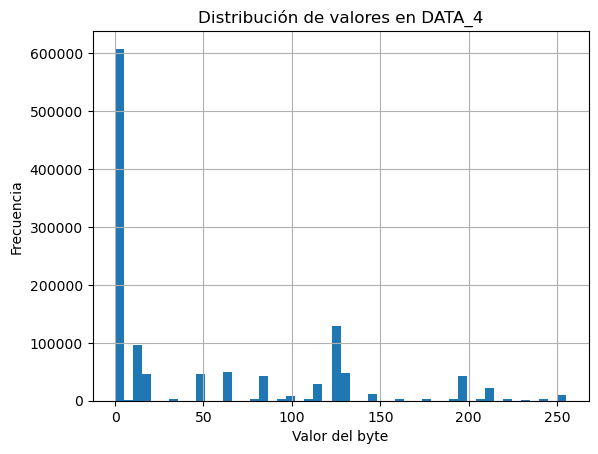

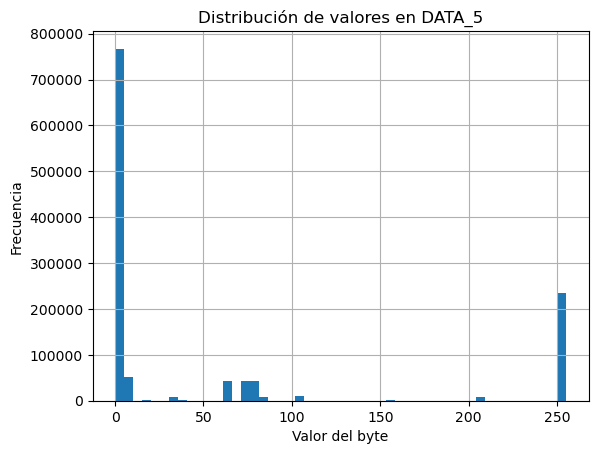

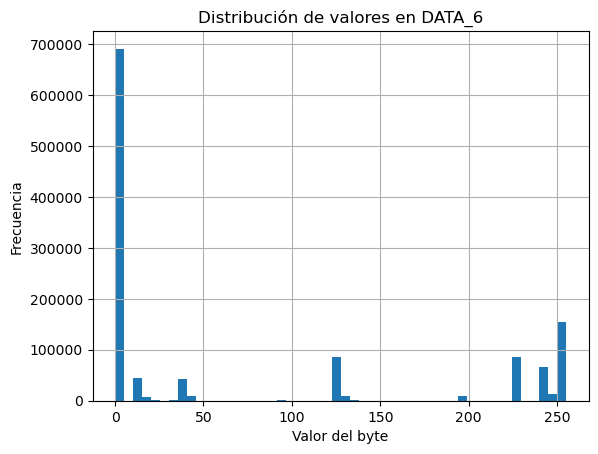

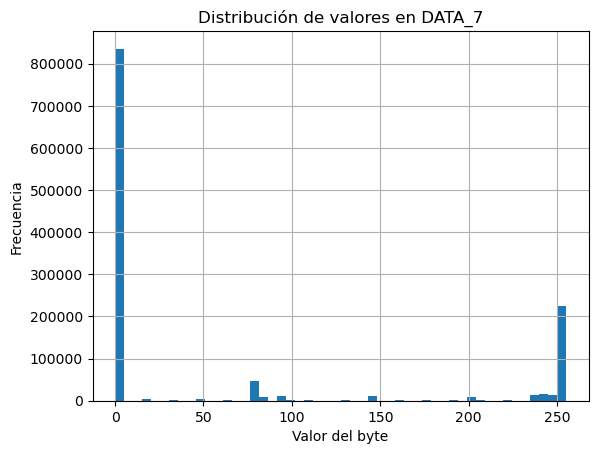

Valores fuera de rango (esperado 0-255):
DATA_0    0
DATA_1    0
DATA_2    0
DATA_3    0
DATA_4    0
DATA_5    0
DATA_6    0
DATA_7    0
dtype: int64 



In [53]:
eda(raw_dec_benign, 'dec_benign')

EDA de dec_dos

Primeras filas:
    ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0  291       0       0       0       0       0       0       0       0   
1  291      14      11       4       4       3       3       8      12   
2  291      14      11       4       4       3       3       8      12   
3  291      14      11       4       4       3       3       8      12   
4  291      14      11       4       4       3       3       8      12   

    label category specific_class  
0  ATTACK      DoS            DoS  
1  ATTACK      DoS            DoS  
2  ATTACK      DoS            DoS  
3  ATTACK      DoS            DoS  
4  ATTACK      DoS            DoS   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74663 entries, 0 to 74662
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              74663 non-null  int64 
 1   DATA_0          74663 non-null  int64 
 2   DATA_1         

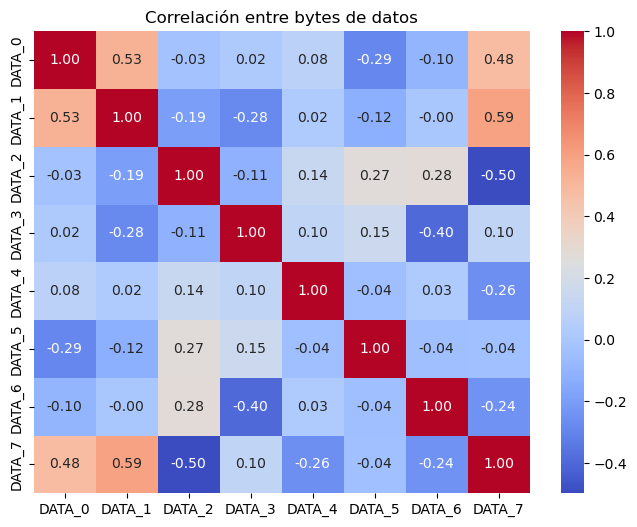

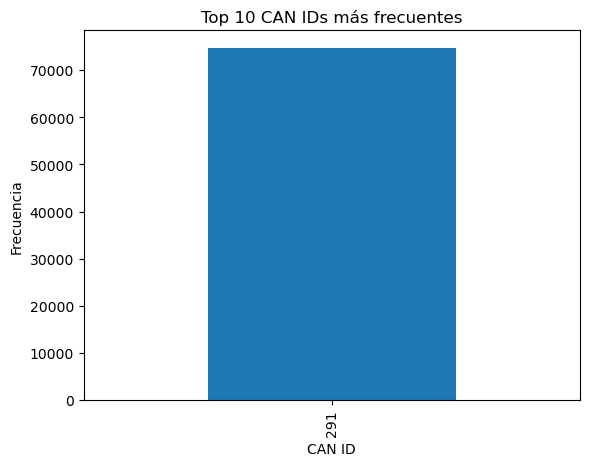

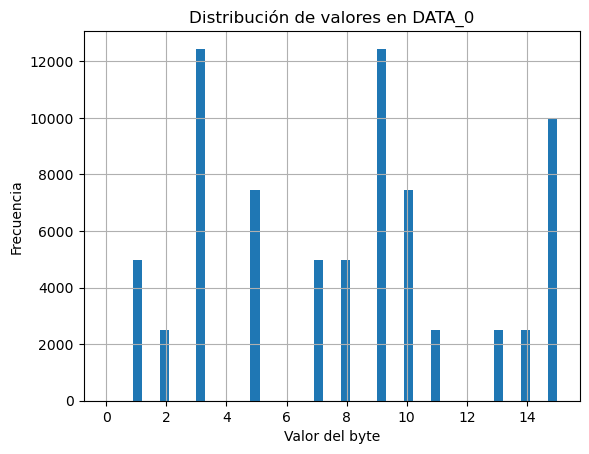

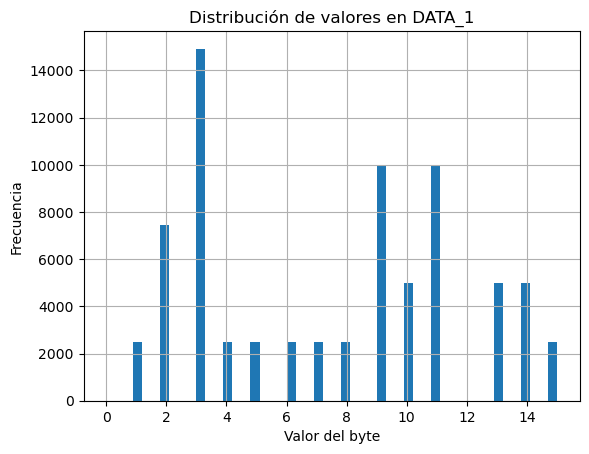

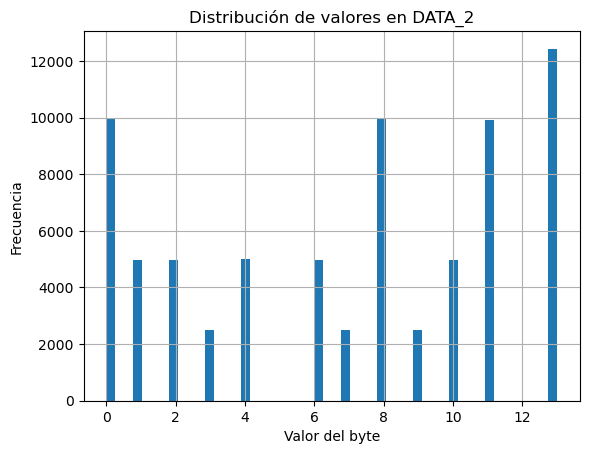

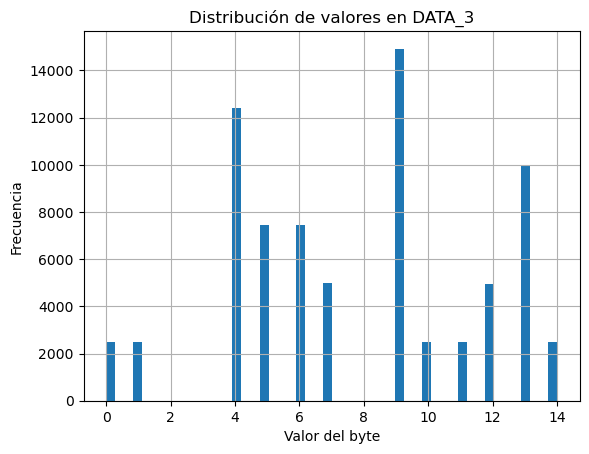

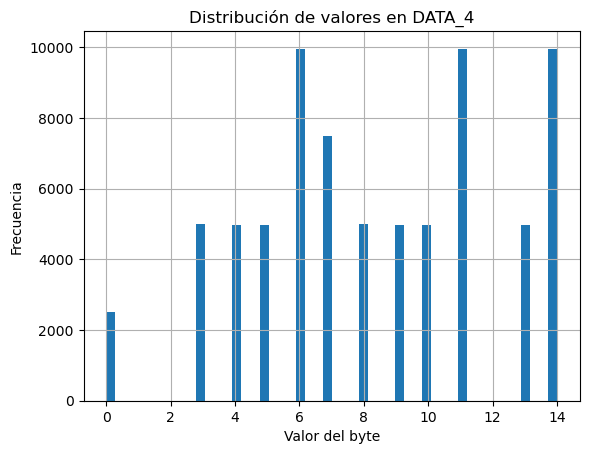

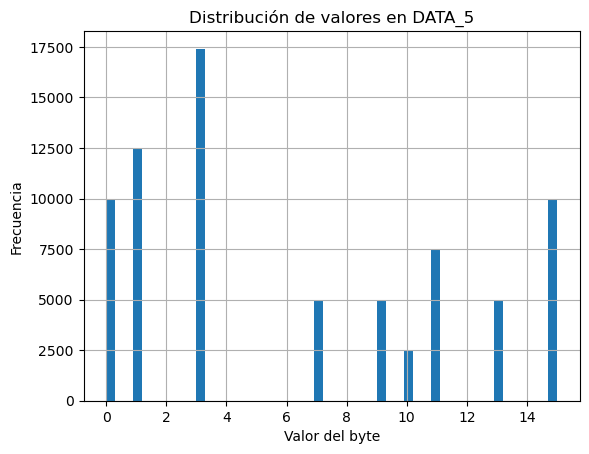

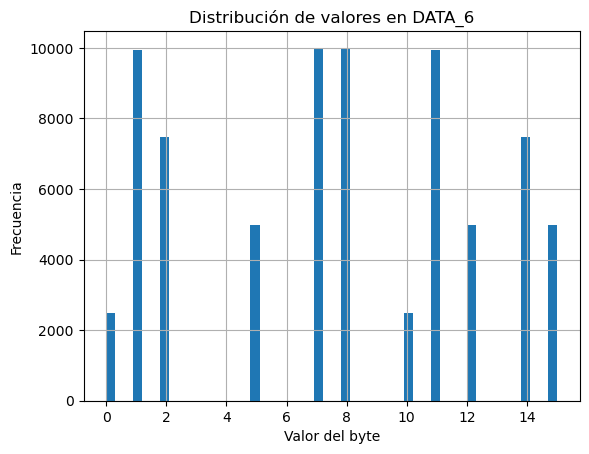

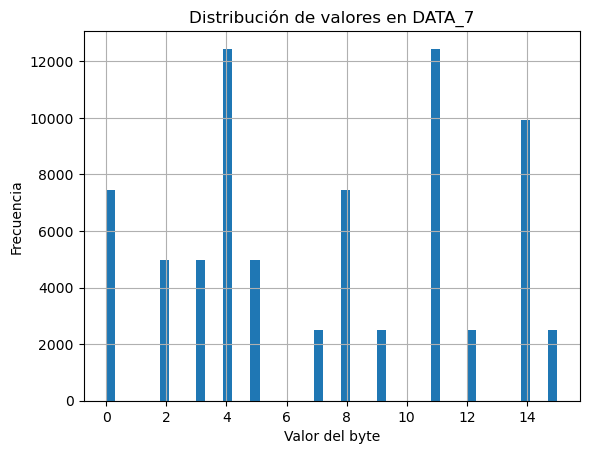

Valores fuera de rango (esperado 0-255):
DATA_0    0
DATA_1    0
DATA_2    0
DATA_3    0
DATA_4    0
DATA_5    0
DATA_6    0
DATA_7    0
dtype: int64 



In [57]:
eda(raw_dec_dos, 'dec_dos')

EDA de dec_gas

Primeras filas:
    ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0  513       0       0       0       0       0       0       0     125   
1  513       0       0       0       0       0       0       0     125   
2  513       0       0       0       0       0       0       0     125   
3  513       0       0       0       0       0       0       0     125   
4  513       0       0       0       0       0       0       0     125   

    label  category specific_class  
0  ATTACK  SPOOFING            GAS  
1  ATTACK  SPOOFING            GAS  
2  ATTACK  SPOOFING            GAS  
3  ATTACK  SPOOFING            GAS  
4  ATTACK  SPOOFING            GAS   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              9991 non-null   int64 
 1   DATA_0          9991 non-null   int64 
 2   DATA_1     

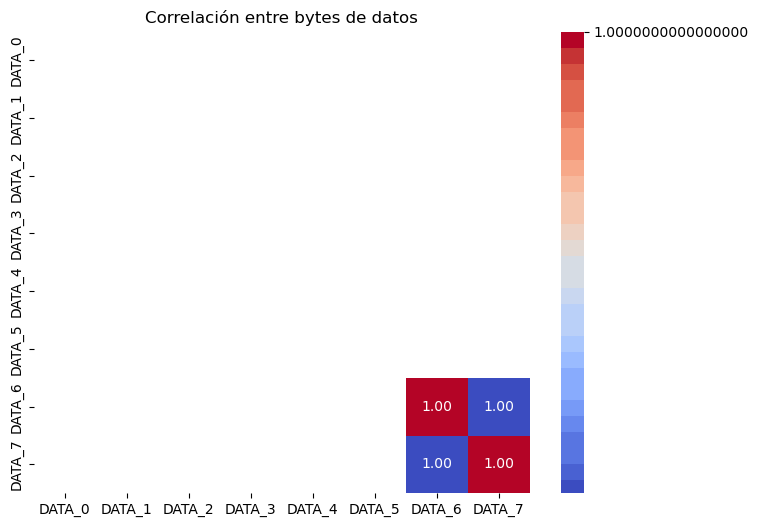

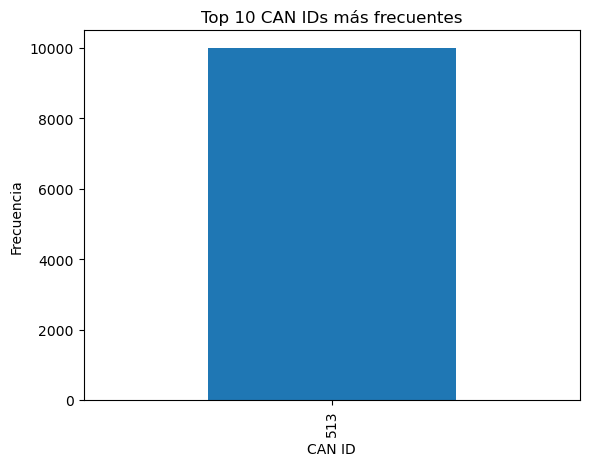

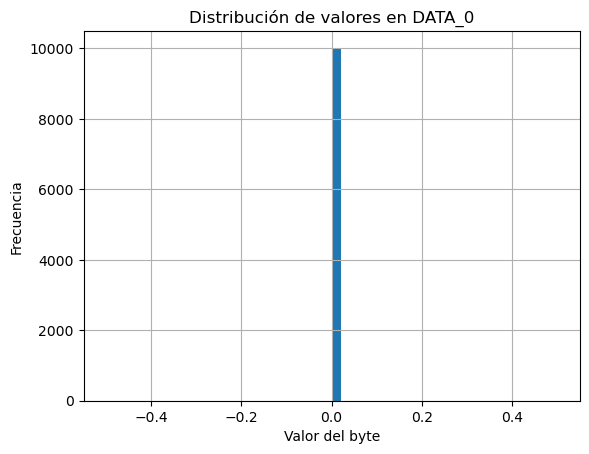

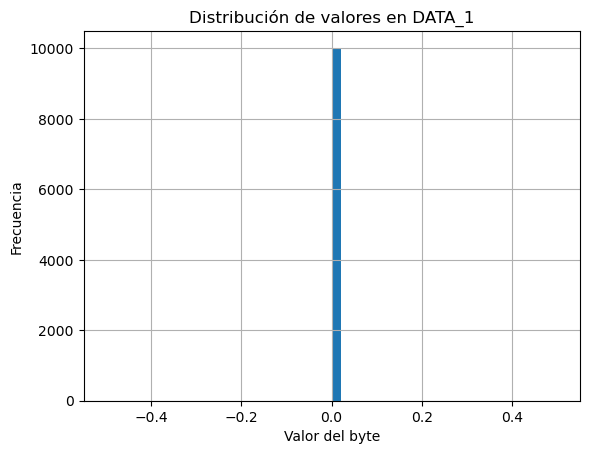

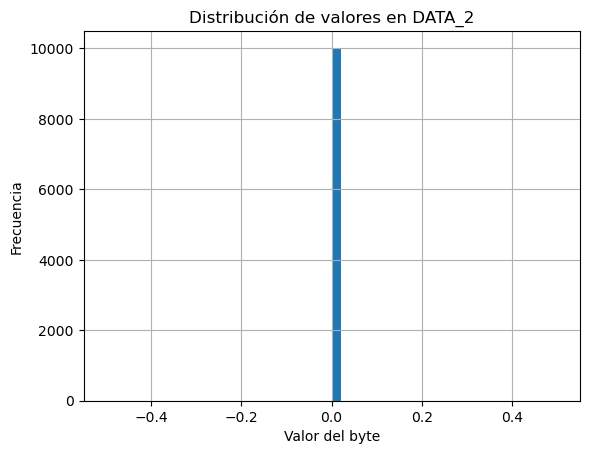

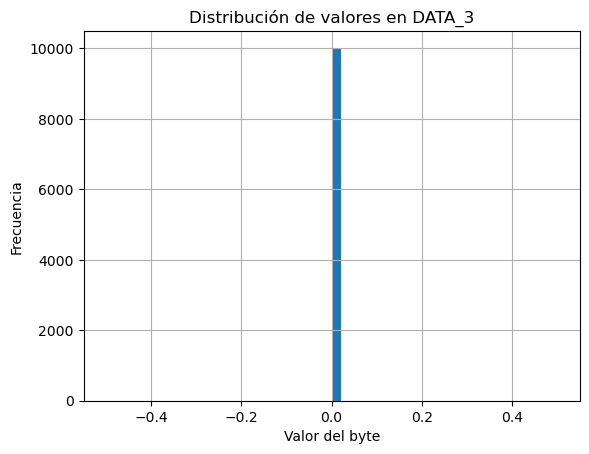

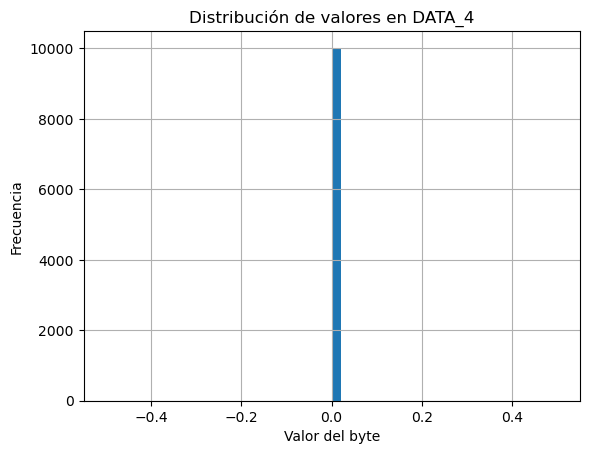

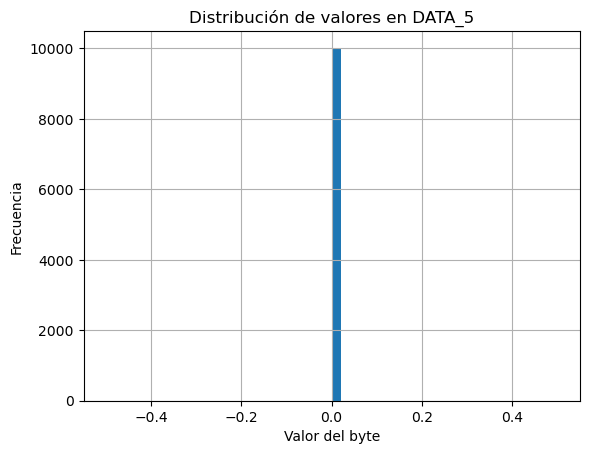

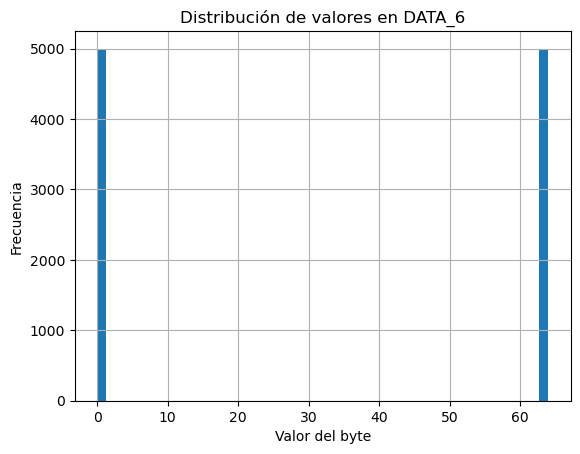

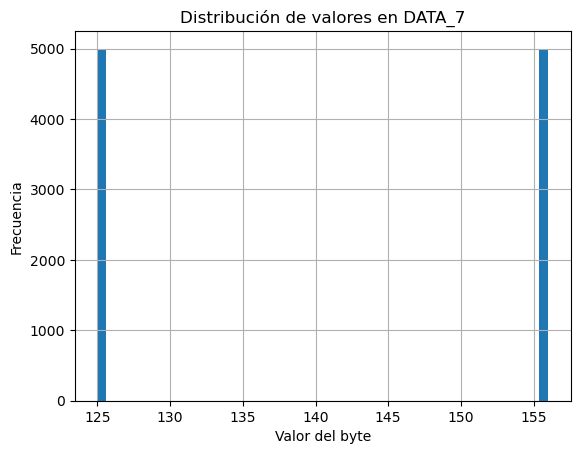

Valores fuera de rango (esperado 0-255):
DATA_0    0
DATA_1    0
DATA_2    0
DATA_3    0
DATA_4    0
DATA_5    0
DATA_6    0
DATA_7    0
dtype: int64 



In [59]:
eda(raw_dec_gas, 'dec_gas')

EDA de dec_rpm

Primeras filas:
    ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0  476       2      61      23      19       0       0       0       0   
1  476       2      61      23      19       0       0       0       0   
2  476       2      61      23      19       0       0       0       0   
3  476       2      61      23      19       0       0       0       0   
4  476       2      61      23      19       0       0       0       0   

    label  category specific_class  
0  ATTACK  SPOOFING            RPM  
1  ATTACK  SPOOFING            RPM  
2  ATTACK  SPOOFING            RPM  
3  ATTACK  SPOOFING            RPM  
4  ATTACK  SPOOFING            RPM   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54900 entries, 0 to 54899
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              54900 non-null  int64 
 1   DATA_0          54900 non-null  int64 
 2   DATA_1   

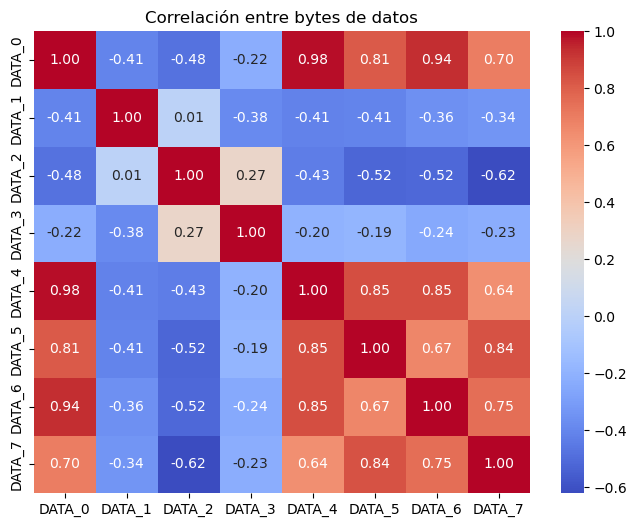

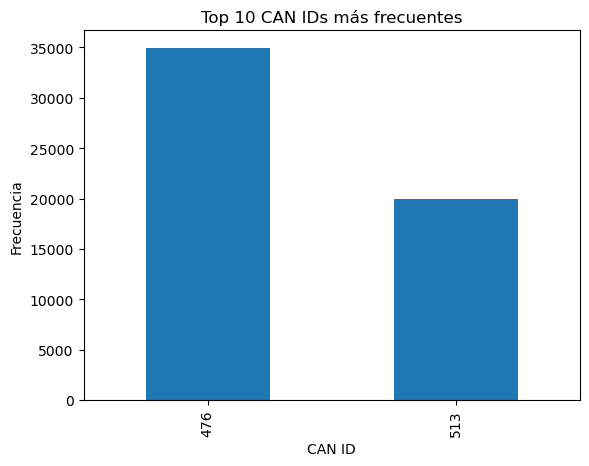

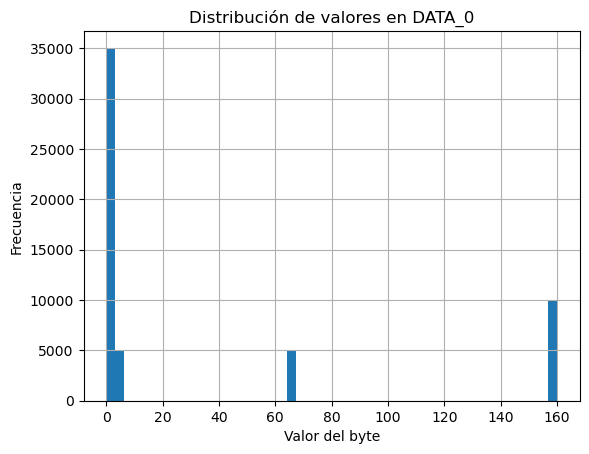

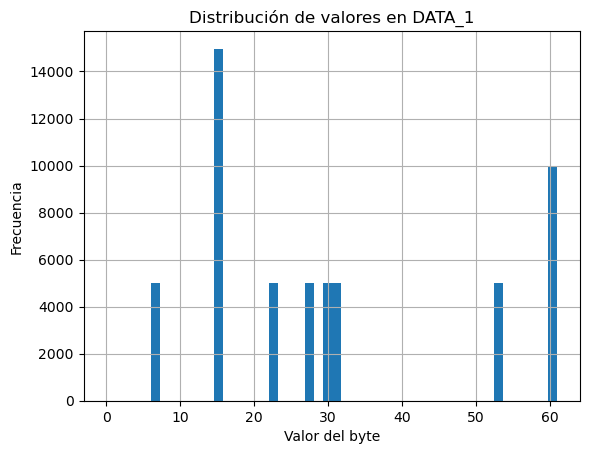

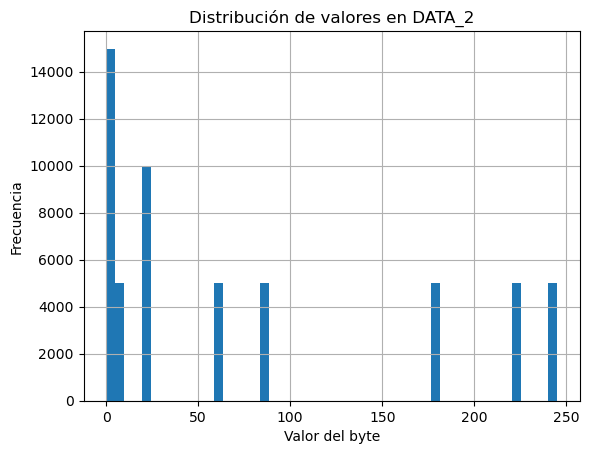

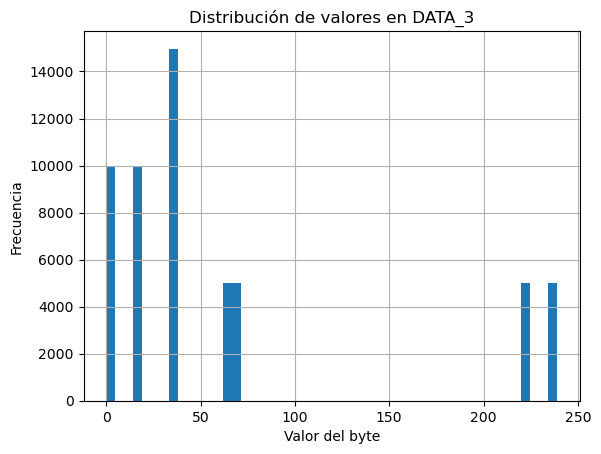

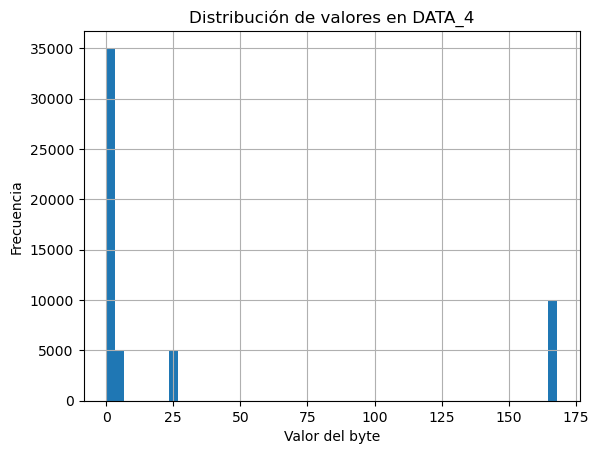

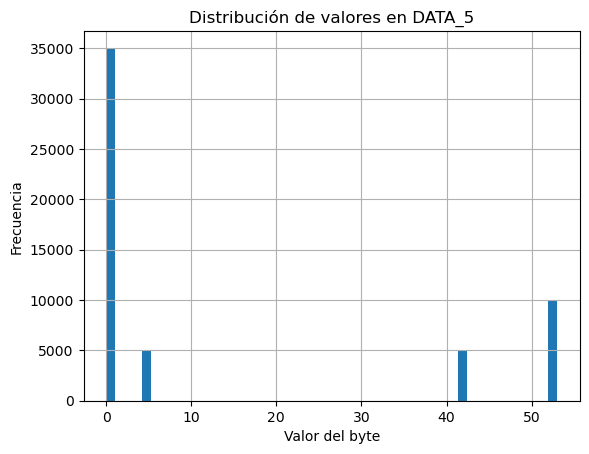

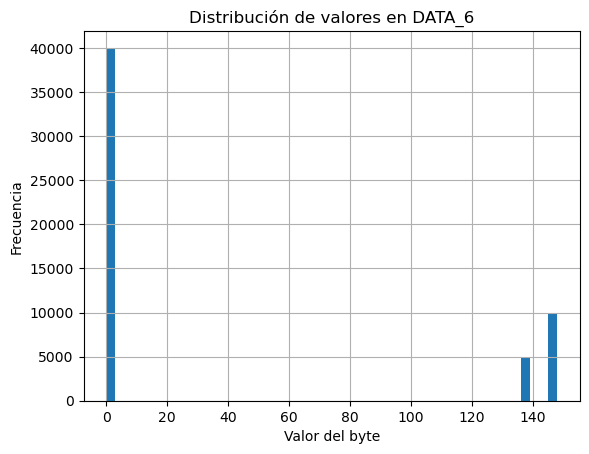

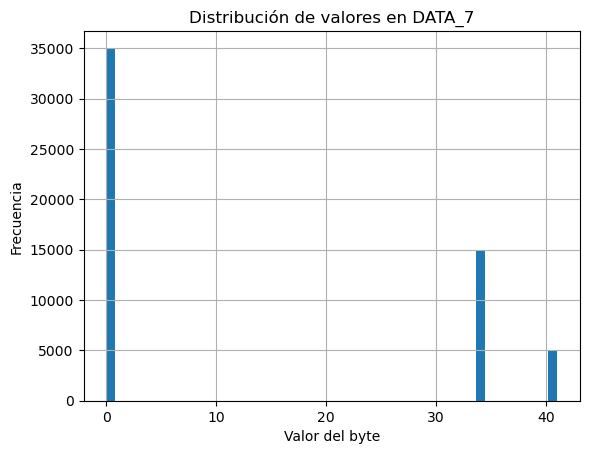

Valores fuera de rango (esperado 0-255):
DATA_0    0
DATA_1    0
DATA_2    0
DATA_3    0
DATA_4    0
DATA_5    0
DATA_6    0
DATA_7    0
dtype: int64 



In [61]:
eda(raw_dec_rpm, 'dec_rpm')

EDA de dec_speed

Primeras filas:
    ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0  344       6      12       6      51       6      26       2      54   
1  344       6      12       6      51       6      26       2      54   
2  344       6      12       6      51       6      26       2      54   
3  344       6      12       6      51       6      26       2      54   
4  344       6      12       6      51       6      26       2      54   

    label  category specific_class  
0  ATTACK  SPOOFING          SPEED  
1  ATTACK  SPOOFING          SPEED  
2  ATTACK  SPOOFING          SPEED  
3  ATTACK  SPOOFING          SPEED  
4  ATTACK  SPOOFING          SPEED   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              24951 non-null  int64 
 1   DATA_0          24951 non-null  int64 
 2   DATA_1 

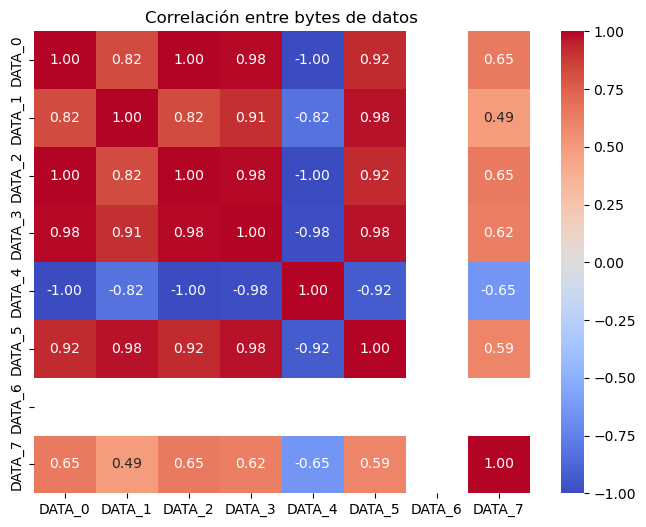

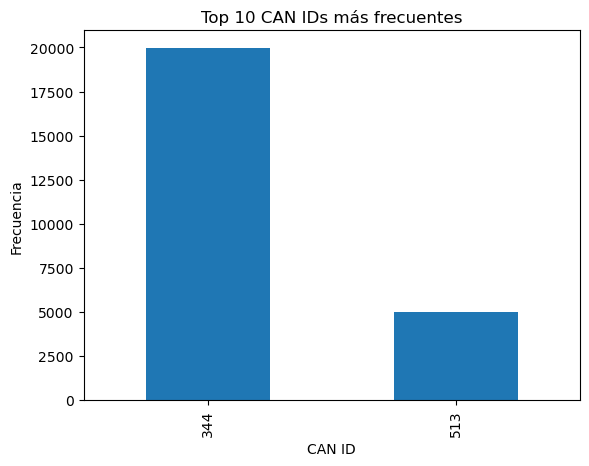

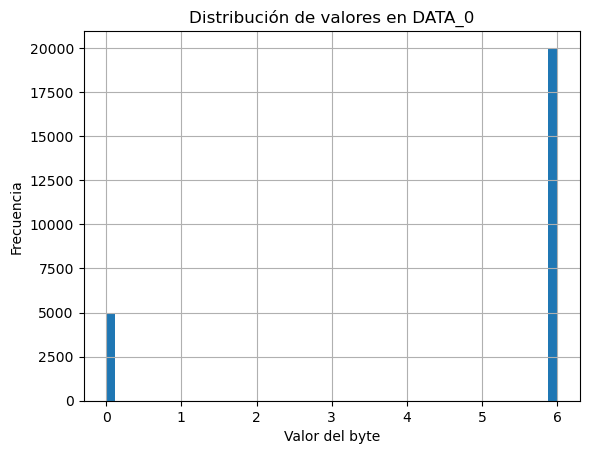

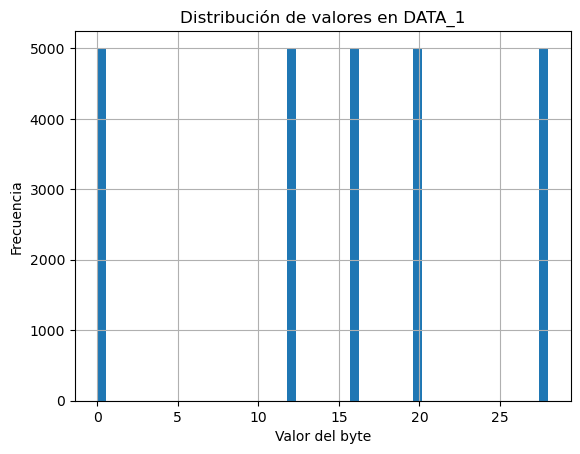

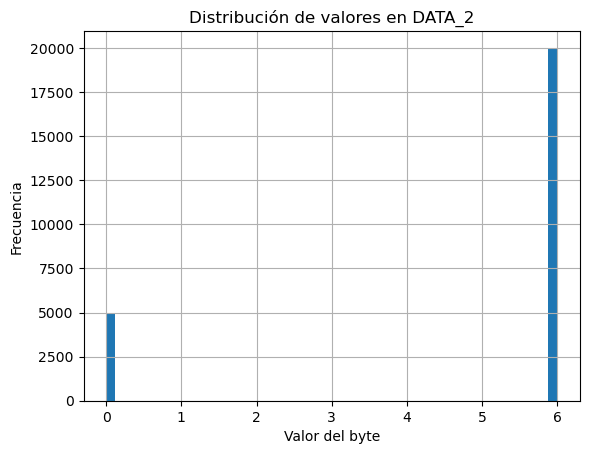

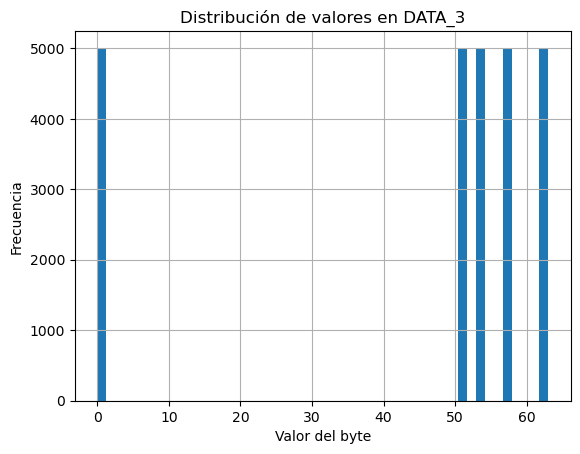

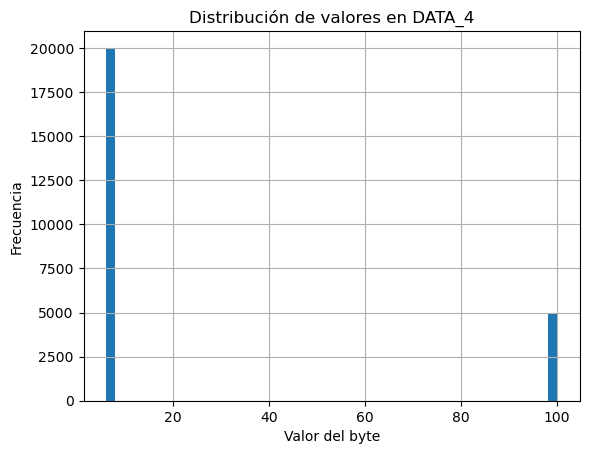

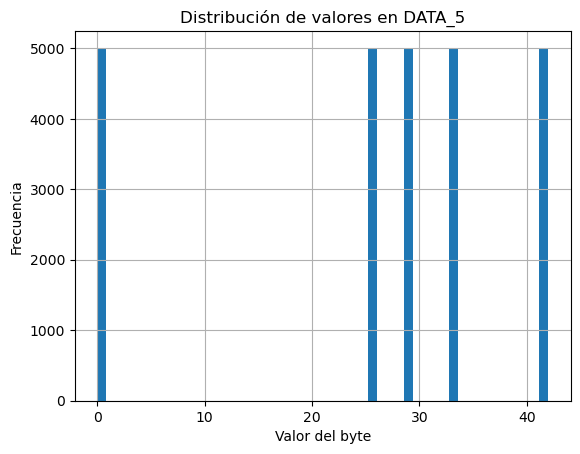

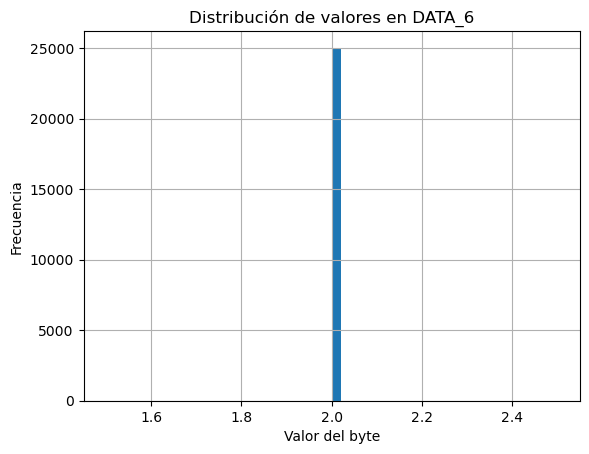

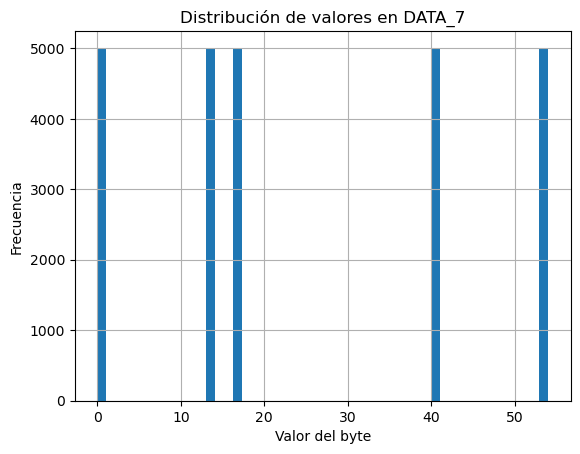

Valores fuera de rango (esperado 0-255):
DATA_0    0
DATA_1    0
DATA_2    0
DATA_3    0
DATA_4    0
DATA_5    0
DATA_6    0
DATA_7    0
dtype: int64 



In [63]:
eda(raw_dec_speed, 'dec_speed')

EDA de dec_wheel

Primeras filas:
    ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0  128       0       0       0       0       0       0       0       0   
1  128     132       3       2      35      24       5     138      34   
2  128     132       3       2      35      24       5     138      34   
3  128     132       3       2      35      24       5     138      34   
4  128     132       3       2      35      24       5     138      34   

    label  category  specific_class  
0  ATTACK  SPOOFING  STEERING_WHEEL  
1  ATTACK  SPOOFING  STEERING_WHEEL  
2  ATTACK  SPOOFING  STEERING_WHEEL  
3  ATTACK  SPOOFING  STEERING_WHEEL  
4  ATTACK  SPOOFING  STEERING_WHEEL   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19977 entries, 0 to 19976
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              19977 non-null  int64 
 1   DATA_0          19977 non-null  int64 
 2   D

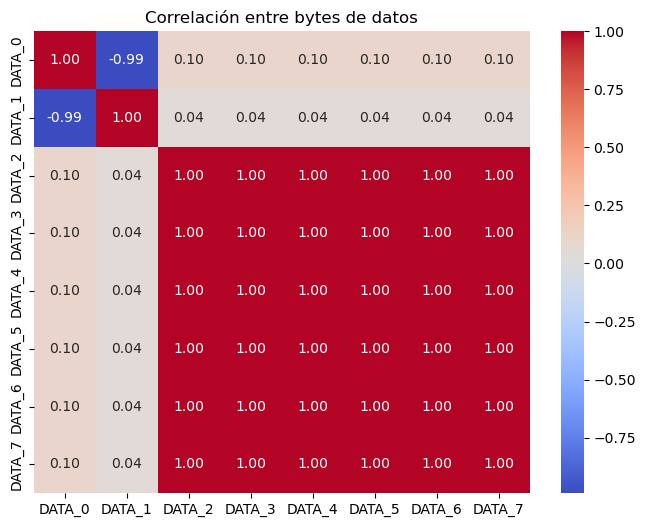

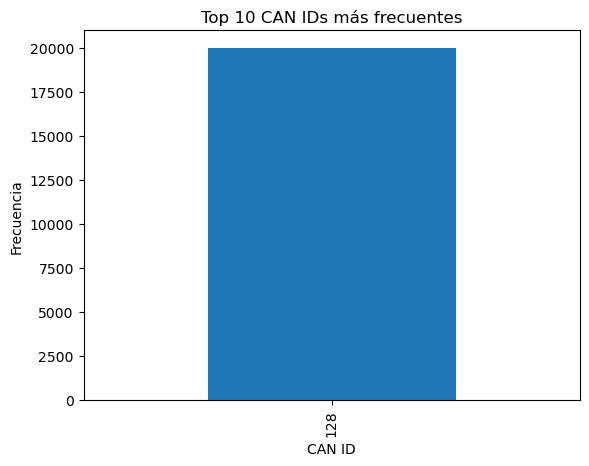

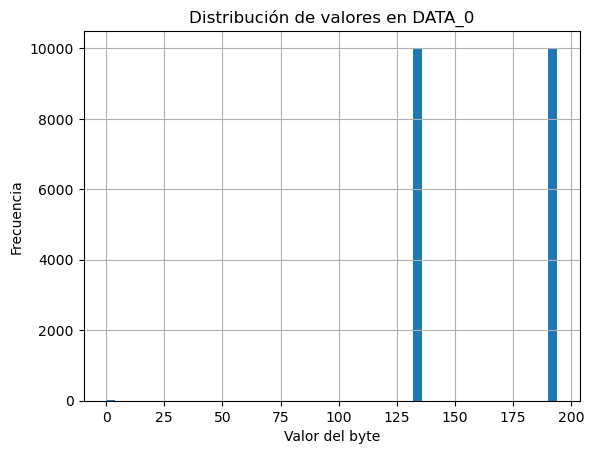

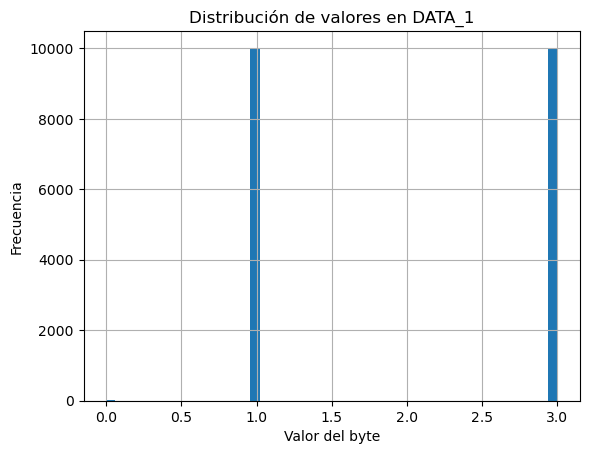

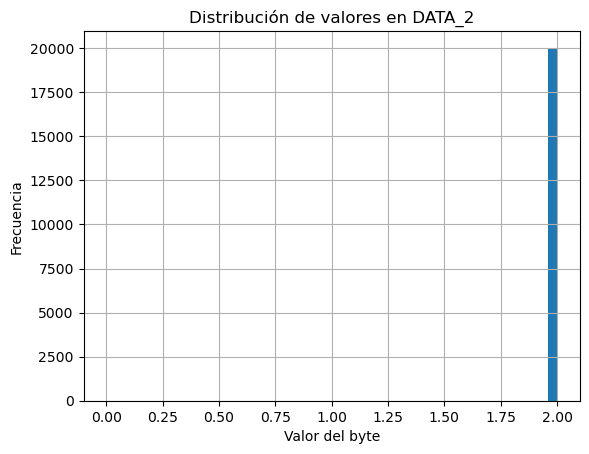

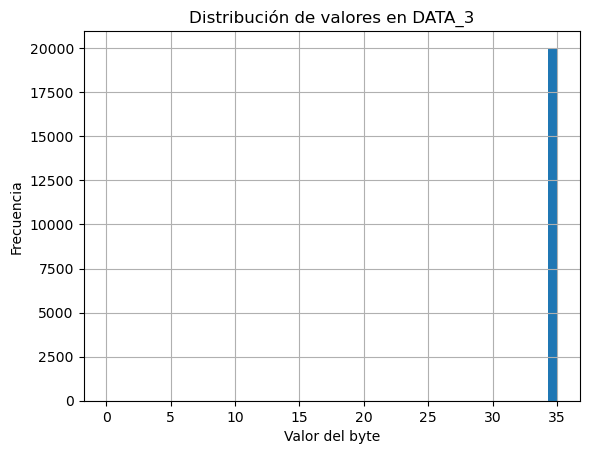

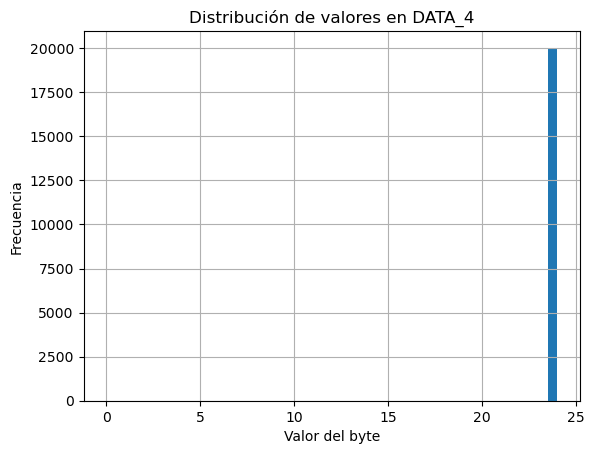

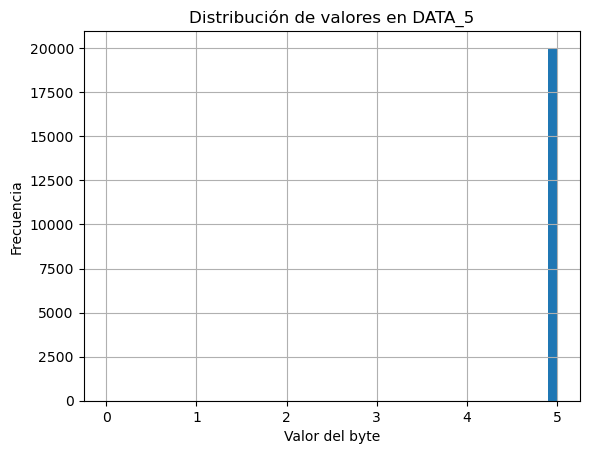

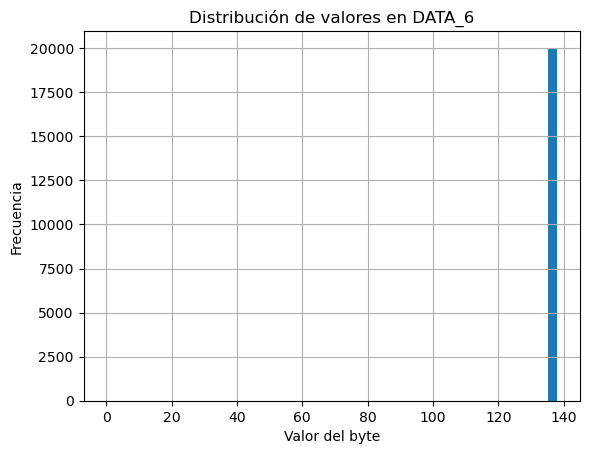

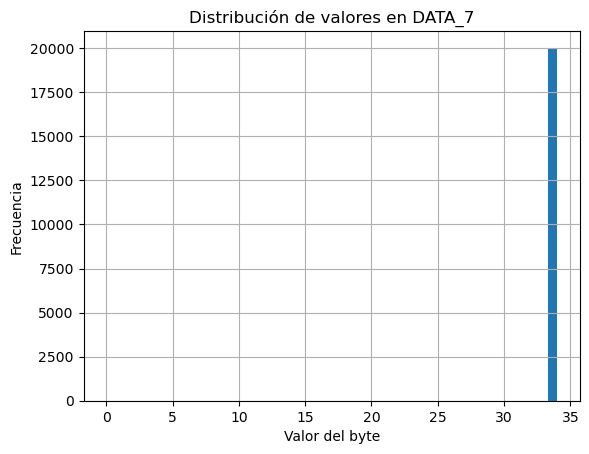

Valores fuera de rango (esperado 0-255):
DATA_0    0
DATA_1    0
DATA_2    0
DATA_3    0
DATA_4    0
DATA_5    0
DATA_6    0
DATA_7    0
dtype: int64 



In [65]:
eda(raw_dec_wheel, 'dec_wheel')

In [ ]:
#Why are there so many duplicate rows in the dataset?
#The data was collected directly from the vehicle and logged into the CSV files. The repeated packets you see represent the types of messages ECUs send internally.
#However, it is important to consider that the CAN BUS packet structure is simpler than other protocols (more details here: CICIoV2024: Advancing realistic IDS approaches against DoS and spoofing attack in IoV CAN bus) and the ECUs were operational but the car was disassembled and stationary for safety reasons.

In [70]:
'''1. Identificación de patrones de ataques
Ataques DoS: CAN ID 291 es exclusivo de este tipo de ataque, con una frecuencia extremadamente alta (74,663 mensajes idénticos).
Los bytes de datos (DATA_0 a DATA_7) muestran valores bajos y repetitivos (ej. DATA_0 entre 0-15), lo que sugiere un patrón de inundación del bus CAN.

Ataques de Spoofing: 
CAN IDs específicos por tipo de ataque:
GAS: ID 513, con DATA_7 entre 125-156 (posible manipulación del acelerador).
RPM: IDs 476 y 513, con DATA_2 y DATA_3 en rangos anómalos (0-245).
SPEED: ID 344, con DATA_3 entre 51-63 (valores fuera del rango normal de velocidad).
Correlaciones fuertes: En dec_rpm, DATA_0 y DATA_4 tienen una correlación de 0.98, lo que indica redundancia y posible simplificación de características.

2. Comportamiento del tráfico benigno
Diversidad de CAN IDs: 72 IDs únicos, frente a 1-2 IDs en ataques.
Duplicados masivos: 99.6% de las filas están repetidas (1,220,190/1,223,737), lo que sugiere mensajes CAN periódicos (ej. parámetros del vehículo transmitidos en intervalos fijos).
Distribución de bytes: DATA_0 y DATA_1 tienen amplios rangos (0-255), mientras que DATA_3 y DATA_4 son mayormente cero, indicando campos no utilizados en tráfico normal.

3. Calidad y preparación de datos
Sin valores faltantes o fuera de rango: Todos los bytes están entre 0-255, validando la integridad técnica de los datos.
Desbalance de clases: Los datos benignos son 16x mayores que los de ataques (1.2M vs. 74k-24k).
Recomendación: Usar técnicas de balanceo (oversampling de ataques o undersampling de benignos) para evitar sesgos en modelos de ML.

4. Señales clave para detección de intrusiones
Frecuencia de mensajes: Ataques como DoS generan tráfico masivo en un solo ID, mientras que el tráfico benigno es diverso.
Valores anómalos en bytes: En dec_gas, DATA_7 = 125-156 (rango inusual para un sistema normal).
En dec_wheel, DATA_0 oscila entre 0-194, con picos en 132 y 194, sugiriendo manipulaciones bruscas del volante.
Redundancia en datos: Correlaciones altas entre variables (ej. DATA_0-DATA_4 en RPM) permiten reducir la dimensionalidad del modelo.

Resumen
Los ataques en CAN se caracterizan por:
Uso exclusivo de IDs específicos.
Patrones repetitivos o valores fuera de rango en bytes de datos.
Frecuencias anormalmente altas de mensajes. Para mejorar la detección, se sugiere priorizar el monitoreo de IDs sospechosos, analizar la distribución de bytes críticos (ej. DATA_7 en GAS) y aplicar técnicas de balanceo de datos.'''

'1. Identificación de patrones de ataques\nAtaques DoS: CAN ID 291 es exclusivo de este tipo de ataque, con una frecuencia extremadamente alta (74,663 mensajes idénticos).\nLos bytes de datos (DATA_0 a DATA_7) muestran valores bajos y repetitivos (ej. DATA_0 entre 0-15), lo que sugiere un patrón de inundación del bus CAN.\n\nAtaques de Spoofing: \nCAN IDs específicos por tipo de ataque:\nGAS: ID 513, con DATA_7 entre 125-156 (posible manipulación del acelerador).\nRPM: IDs 476 y 513, con DATA_2 y DATA_3 en rangos anómalos (0-245).\nSPEED: ID 344, con DATA_3 entre 51-63 (valores fuera del rango normal de velocidad).\n\nCorrelaciones fuertes: En dec_rpm, DATA_0 y DATA_4 tienen una correlación de 0.98, lo que indica redundancia y posible simplificación de características.\n\n2. Comportamiento del tráfico benigno\nDiversidad de CAN IDs: 72 IDs únicos, frente a 1-2 IDs en ataques.\n\nDuplicados masivos: 99.6% de las filas están repetidas (1,220,190/1,223,737), lo que sugiere mensajes CAN pe